### Multi-class ordered variables
### Proportional odds logistic regression technique

### Job satisfaction level — Dissatisfied, Satisfied, Highly Satisfied
### Performance of an individual — Poor, Fair, Excellent
### Impact of a regulation on bank’s performance — Positive, Neutral, Negative

In [3]:
install.packages('carData')
install.packages('MASS')
library(carData)
library(MASS)

Installing package into 'C:/Users/onlys/Documents/R/win-library/3.5'
(as 'lib' is unspecified)

Warning message:
"package 'carData' is in use and will not be installed"
Installing package into 'C:/Users/onlys/Documents/R/win-library/3.5'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
       binary   source needs_compilation
MASS 7.3-51.5 7.3-51.6              TRUE



installing the source package 'MASS'




In [7]:
data(WVS)
head(WVS)

,poverty,religion,degree,country,age,gender
,<ord>,<fct>,<fct>,<fct>,<int>,<fct>
1,Too Little,yes,no,USA,44,male
2,About Right,yes,no,USA,40,female
3,Too Little,yes,no,USA,36,female
4,Too Much,yes,yes,USA,25,female
5,Too Little,yes,yes,USA,39,male
6,About Right,yes,no,USA,80,female


### Poverty is the multi-class ordered dependent variable with categories — ‘Too Little’, ‘About Right’ and ‘Too Much’

In [9]:
summary(WVS)

        poverty     religion   degree          country          age       
 Too Little :2708   no : 786   no :4238   Australia:1874   Min.   :18.00  
 About Right:1862   yes:4595   yes:1143   Norway   :1127   1st Qu.:31.00  
 Too Much   : 811                         Sweden   :1003   Median :43.00  
                                          USA      :1377   Mean   :45.04  
                                                           3rd Qu.:58.00  
                                                           Max.   :92.00  
    gender    
 female:2725  
 male  :2656  
              
              
              
              

#### Analyze the distribution of poverty across age, sex and country

In [13]:
install.packages('ggplot2')
library(ggplot2)

Installing package into 'C:/Users/onlys/Documents/R/win-library/3.5'
(as 'lib' is unspecified)

also installing the dependency 'isoband'




package 'isoband' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\onlys\AppData\Local\Temp\Rtmp04Shvk\downloaded_packages


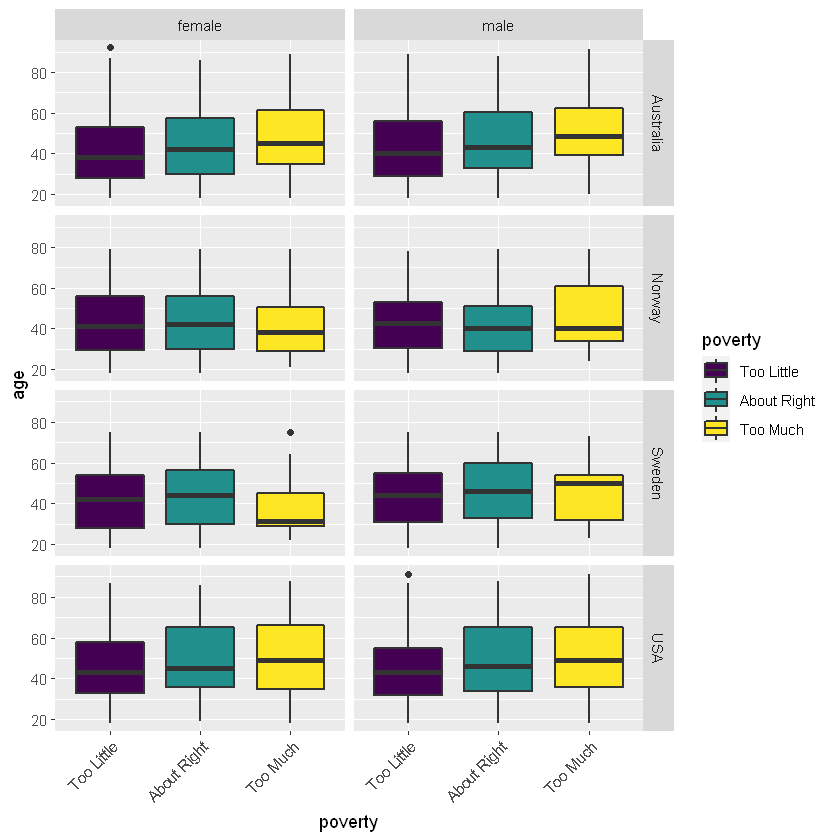

In [14]:
ggplot(WVS, aes(x = poverty, y = age, fill = poverty)) +   geom_boxplot(size = .75) +   facet_grid(country ~ gender, margins = FALSE) +   theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

### Fitting the Model

In [15]:
model_fit <- polr(poverty~religion+degree+country+age+gender, data = WVS, Hess = TRUE)
summary(model_fit)

Call:
polr(formula = poverty ~ religion + degree + country + age + 
    gender, data = WVS, Hess = TRUE)

Coefficients:
                 Value Std. Error t value
religionyes    0.17973   0.077346   2.324
degreeyes      0.14092   0.066193   2.129
countryNorway -0.32235   0.073766  -4.370
countrySweden -0.60330   0.079494  -7.589
countryUSA     0.61777   0.070665   8.742
age            0.01114   0.001561   7.139
gendermale     0.17637   0.052972   3.329

Intercepts:
                       Value   Std. Error t value
Too Little|About Right  0.7298  0.1041     7.0128
About Right|Too Much    2.5325  0.1103    22.9496

Residual Deviance: 10402.59 
AIC: 10420.59 

#### The significance of coefficients and intercepts

In [16]:
summary_table <- coef(summary(model_fit))
pval <- pnorm(abs(summary_table[, "t value"]),lower.tail = FALSE)* 2
summary_table <- cbind(summary_table, "p value" = round(pval,3))
summary_table

,Value,Std. Error,t value,p value
religionyes,0.17973194,0.077346042,2.323738,0.020
degreeyes,0.14091745,0.066193109,2.128884,0.033
countryNorway,-0.32235359,0.073766034,-4.369946,0.000
countrySweden,-0.60329785,0.079493909,-7.589234,0.000
countryUSA,0.61777260,0.070664761,8.742301,0.000
age,0.01114091,0.001560585,7.138933,0.000
gendermale,0.17636863,0.052972253,3.329453,0.001
Too Little|About Right,0.72976353,0.104061643,7.012800,0.000
About Right|Too Much,2.53247870,0.110349780,22.949558,0.000


#### Since the p-value for all the variables <0.05, hence they are statistically significant at 95% CI

### Making Predictions on New Data

In [ ]:
#### Test_Person
#Religion : yes
#Degree : no
#Country : Norway
#Age : 30
#Gender : male

In [18]:
new_data = data.frame('religion' = 'yes', 'degree'='no', 'country'='Norway', 'age'=30, 'gender'='male')
round(predict(model_fit, new_data, type='p'),3)

Too Little About Right    Too Much 
      0.589       0.308       0.103

#### Our model predicts that the individual Test_Person believes that the government’s effort to reduce poverty are Too Little